<a href="https://colab.research.google.com/github/Raviteja654321/CVIT_Workshop/blob/main/Day_3/Session_1/Day_3_CV_Workshop_Optimisation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convex Optimization

- Notebook Link: https://tinyurl.com/cw23-co-notebook

In [6]:
!pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CVXPY is a Python-embedded modeling language for ***convex optimization*** problems. It automatically transforms the problem into ***standard form***, calls a solver, and unpacks the results.

- What is ***optimisation***?  
  ***Optimisation*** is central to decision making tasks in various fields. The task of decision masking involves choices between various alternatives. These choices are governed by our desire to make the "best" decision. The measure of goodness of the alternatives is described by an objective
function or performance index. Optimization theory and methods deal with selecting
the best alternative in the sense of the given objective function

- Example:  
  
  ***CP says hi!!!***  

  A Knapsack Problem?
  - You have limited strength, so there is a maximum weight knapsack you can carry
  - Each object has a particular weight and a value and hence anyone would like to maximise the value for the maximum weight that one can carry
  - This maximisation of an objective i.e the value of the objects picked under a variety of cosntraints i.e the total weight that you can carry is an example of an optimisation problem
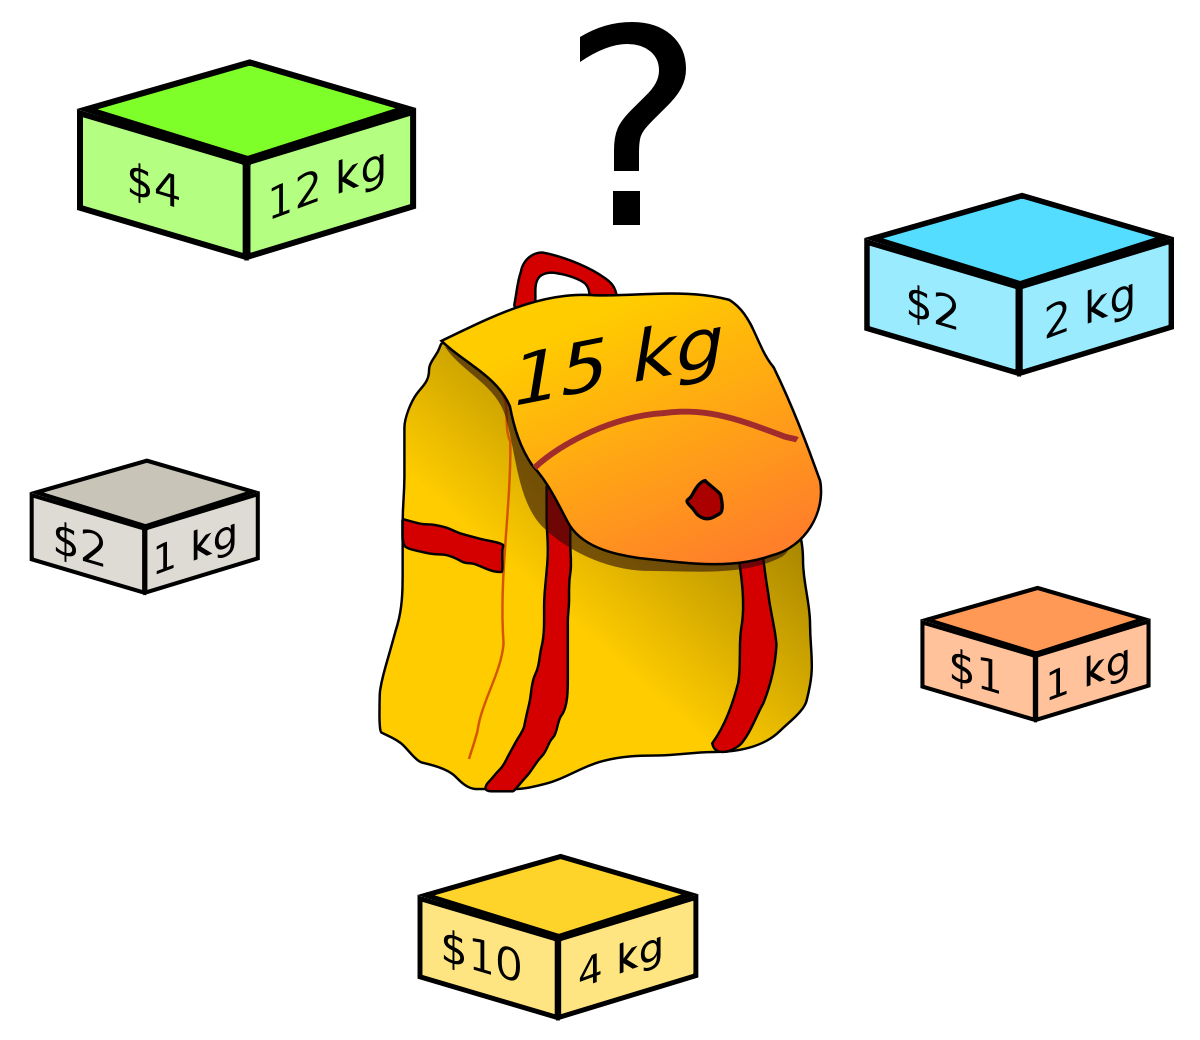




- What is Convex Optimisation?  
  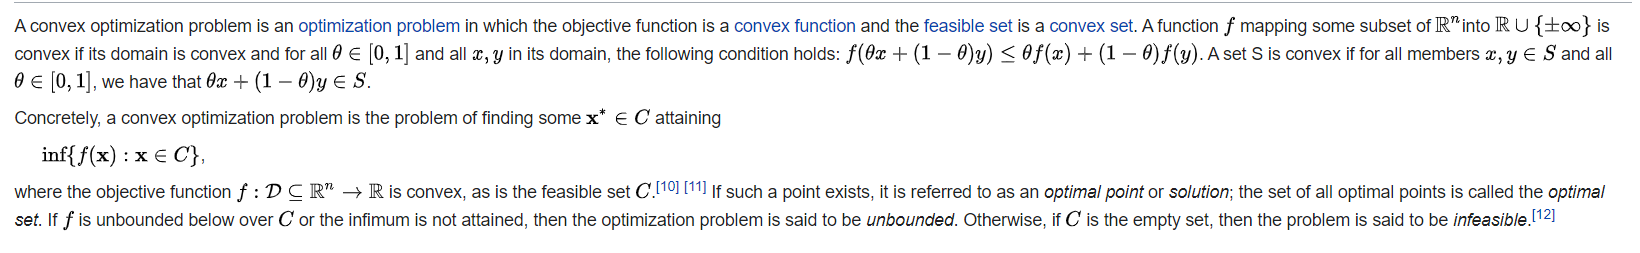

*italicised text*- What is the standard form?

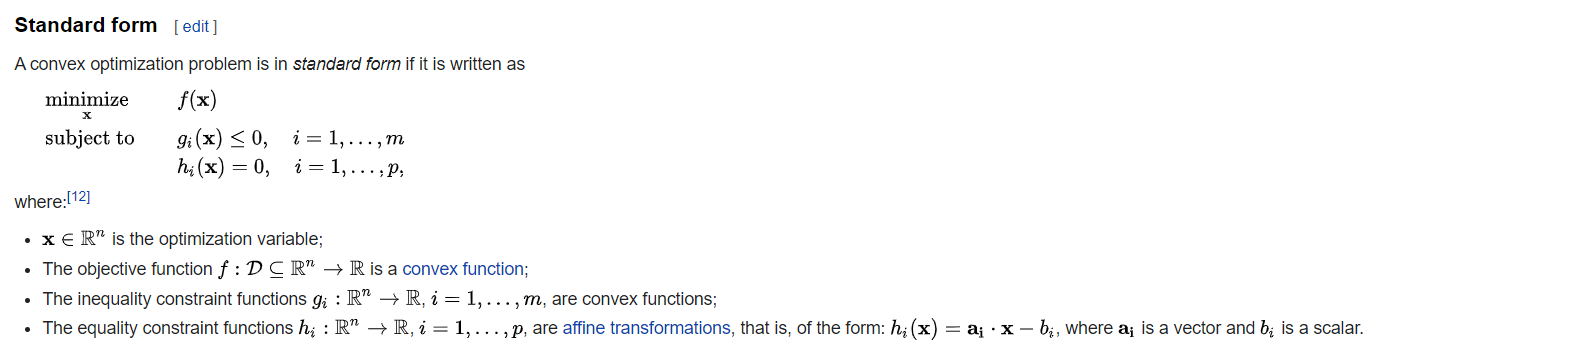


## Simple Variable Example

- `cp.Variable(n)` defines a vector of variables or dimensions on whose value the objective function is dependent on. Often constraints are placed on these variables. `n` indicates the number of Variables.

- `constraints` is a list of constraints that the variables need to follow and the optimisation must obey these constraints and find the optimum under these constraints. 

- `cp.Problem()` creates a problem instance that needs to be solved by calling the 

In [7]:
import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status: optimal
optimal value 1.0
optimal var 1.0 1.570086213240983e-22


In [8]:
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()

# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.79109253e-19  2.85112420e-02  2.79973443e-19  3.37658751e-20
 -2.72802659e-19  1.49285011e-01 -9.97212062e-20  8.35373892e-20
  2.46718649e-01  5.78224144e-01 -4.03739462e-19  1.01242860e-03
 -9.28486200e-20  2.26767464e-01 -1.58813677e-19 -8.97232308e-20
 -1.22145726e-19 -1.51509432e-19  1.12060673e-19 -3.48318630e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


Get a grip over the framework by trying it on a simple function that you can think off. If possible graph the function and prove your point. Make sure that the function is convex or if other optimisation look up for appropriate solvers.



In [9]:
x = cp.Variable()
y = (x**3 - 3*(x**2))
y.is_quasiconvex()

False

In [10]:
import cvxpy
import numpy as np

# The data for the Knapsack problem
# P is total weight capacity of sack
# weights and utilities are also specified
P = 165
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82])
utilities = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])

# The variable we are solving for
selection = cvxpy.Variable(len(weights),boolean=True)

# The sum of the weights should be less than or equal to P
weight_constraint = weights * selection <= P

# Our total utility is the sum of the item utilities
total_utility = utilities * selection

# We tell cvxpy that we want to maximize total utility 
# subject to weight_constraint. All constraints in 
# cvxpy must be passed as a list
knapsack_problem = cvxpy.Problem(cvxpy.Maximize(total_utility), [weight_constraint])

# Solving the problem
knapsack_problem.solve(solver=cvxpy.GLPK_MI)

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


309.0

Try DP based solution for different lengths and verify if CVXPY converges to the solution for different lengths of N. (Exercise)

In [11]:
import matplotlib.pyplot as plt
import numpy as np


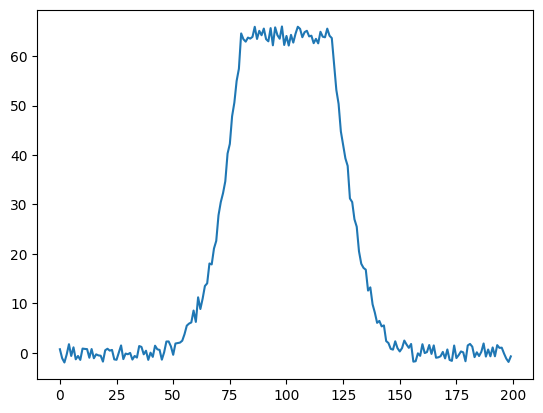

In [12]:
x = [0]*40 + [i/10 for i in range(0,40)] + [4]*40 + [i/10 for i in range(40,0,-1)] + [0]*40
x = np.array(x)
x = (x**3) 
x = x + np.random.uniform(-2,2,x.shape[0])
# np.save("input.npy",x)
plt.plot(range(x.shape[0]),x)

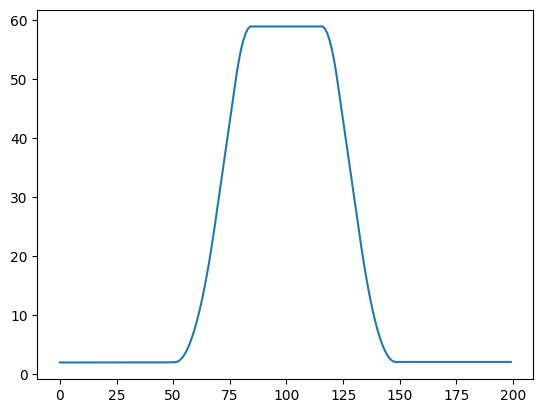

In [13]:
# print(x.shape)
r=cp.Variable(x.shape)
# objective = cp.Minimize(1/2*cp.sum((x-r)**2) + 100*cp.sum(cp.abs(r[1:] - r[:-1])))

objective = cp.Minimize(1/2*cp.sum((x-r)**2) + 100*cp.sum(cp.abs(r[1:] - r[:-1]))+100*cp.sum(cp.abs(r[2:] - 2 * r[1:-1] + r[:-2])) +100*cp.sum(cp.abs(r[3:]- 3 * r[2:-1] + 3 * r[1:-2] - r[:-3])));
#..............................................100* first order+..................+100*second order+...............................+100*third ordre
# objective = cp.Minimize(cp.sum_squares(r-x))
# objective = cp.Minimize(1/2*cp.sum((x-r)**2) )
# constraints = [0 <= r, r <= 1]
# constraints= [r[2:n] - 2 * r[1:n-1] + r[:n-2] == 0] #second order
constraints = []
prob = cp.Problem(objective, constraints)


# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
plt.plot(range(len(x)), r.value, label='Smoothed Curve')
# 1/2*cp.sum((x-r)**2) + 100*cp.sum(cp.abs(r[1:] - r[:-1]))

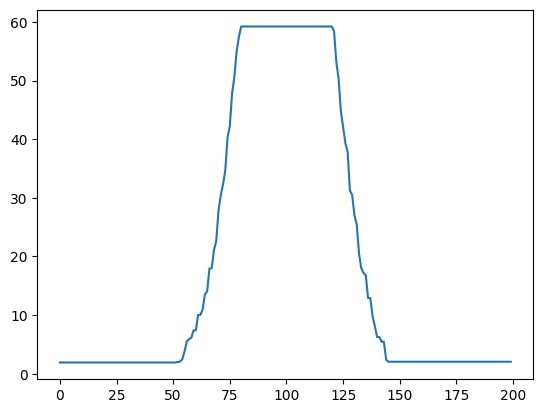

In [14]:
r = cp.Variable(x.shape)
obj = cp.Minimize(1/2*cp.sum((x-r)**2) + 100*cp.sum(cp.abs(r[1:] - r[:-1])))
prob = cp.Problem(obj, [])
prob.solve()
plt.plot(range(x.shape[0]), r.value)

In [15]:
# r = cp.Variable(x.shape)
# obj = cp.Minimize(1/2*cp.sum((x-r)*2) + 20*cp.sum(cp.abs((r[1:] - r[:-1])*2)) +  80*cp.sum(cp.abs(r[1:] - r[:-1])) )
# prob = cp.Problem(obj, [])
# prob.solve()
# plt.plot(range(x.shape[0]), r.value)

## Cinematic Shot Generation using Convex Optimizaiton

**Data**: https://tinyurl.com/cw23-co-data

In [16]:
# This package is preferred over simple opencv package 
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [18]:
%%capture
source_folder = 'inputs'

!mkdir -p ./{source_folder} > /dev/null ;

In [19]:
video = 'dance2.mp4'
# bbox = "dance2-p1-MS.txt"
bbox = "noisy_p1_ms.npy"

source_path = f'./{source_folder}/{video}'

In [20]:
%%capture
output_folder = 'outputs'

!mkdir -p ./{output_folder} > /dev/null ;

### Extracting Frames from Video

In [21]:
data_folder = 'frames'
frames_path = f"./{data_folder}/{video.rsplit('.', 1)[0]}"

In [22]:
%%capture

!mkdir -p {frames_path}

In [23]:
## Use ffmpeg to extract frames for first 10-30 seconds of the video (see documentation: https://ffmpeg.org/ffmpeg.html)
!ffmpeg -i ./inputs/dance2.mp4 -vf "select='between(t,10,30)',setpts=N/(30*TB)" ./frames/dance2/output_frame_%03d.jpg
# !ffmpeg -t 30 -i {source_path} {frames_path}/'frame_%04d.png'
# !ffmpeg -i ./inputs/dance2.mp4 -vf "select='between(t,10,30)',setpts=N/(30*TB)" output_frame_%03d.jpg

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

### Loading Bounding Boxes

In [24]:
# p1_bbox = []

# with open(f'./{source_folder}/{bbox}', "r") as f:
#     for line in f.readlines():
#         a = [float(x) for x in line.split()]
#         new_data = [(a[0] + a[2])/2, (a[1] + a[3])/2, abs(a[1] - a[3])/2] # [xc, yc, h/2]
#         p1_bbox.append(new_data)

# p1_bbox = np.array(p1_bbox)

In [25]:
p1_bbox = np.load(f'./{source_folder}/{bbox}')

FileNotFoundError: ignored

In [ ]:
## Load .npy file

### Saving/Visualizing Video with Noisy BBox Coordinates

In [ ]:
def plot_bbox(bbox, n=100):
    fig = plt.figure(num=None, figsize=(20, 5), dpi=100)
    axes = fig.subplots(1, 3)

    axes[0].plot(range(n), bbox[:n,0])
    axes[1].plot(range(n), bbox[:n,1])
    axes[2].plot(range(n), bbox[:n,2])

    plt.show()
    plt.close(fig)

In [ ]:
plot_bbox(p1_bbox, n=200)

In [ ]:
# Write a function to Draw BBox in frames and save as video
import glob
import gc
from google.colab.patches import cv2_imshow # for image display

def save_frames(vid_name, bbox, fps=24.0, output_path='./outputs', file_name='temp'):
    eps = 0.0001

    aspect_ratio = 16/9
    
    cap = cv2.VideoCapture(f'./{source_folder}/{vid_name}.mp4')

    frame_rate = float(cap.get(cv2.CAP_PROP_FPS))
    print(f'frame_rate: {frame_rate}')

    frame_size = (int(cap.get(3)),int(cap.get(4)))
    print(f'frame_size: {frame_size}')

    # wait_time = int(1000 // fps)
    wait_time = 1
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    # fourcc = cv2.VideoWriter_fourcc(*'XVID')
    
    save_path = os.path.join(output_path, f"{file_name.rsplit('.', 1)[0]}.mp4")
    # save_path = os.path.join(output_path, f"{file_name.rsplit('.')[0]}.avi")
    
    vid_wrt = cv2.VideoWriter(save_path, fourcc, frame_rate, frame_size)

    for i, file_name in enumerate(sorted(os.listdir(f"{data_folder}/{vid_name}"))):
    # for i, file_path in enumerate(sorted(glob.glob(f'./{data_folder}/{vid_name}/*.png', recursive = False))):
        # frame = cv2.imread(file_path)
        frame = cv2.imread(f"{data_folder}/{vid_name}/{file_name}")
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB).astype(np.float64)

        frame = (frame - frame.min()) * 255 / (frame.max() - frame.min() + eps)
        frame = frame.astype(np.uint8)
        
        ## For opencv compatibility
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        ## Draw rectangle
        xc, yc, half_h = bbox[i]
        x1, y1, x2, y2 = (xc - half_h * aspect_ratio), (yc - half_h), (xc + half_h * aspect_ratio), (yc + half_h)

        frame = cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 1)

        # cv2.imshow('frame',frame)
        # cv2_imshow(frame)

        if cv2.waitKey(wait_time) & 0xFF == ord('q'):
            break
        
        vid_wrt.write(frame)

        del frame
        gc.collect()
    
    cap.release()
    vid_wrt.release()
    cv2.destroyAllWindows()

In [ ]:
save_frames(f'dance2', p1_bbox, file_name=f'dance2_noisy')

### Smoothing out the tracks by posing this as an Optimization Problem




In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

### Saving/Visualizing Resultant Output

In [ ]:
rx = cp.Variable(p1_bbox.shape[0])
ry = cp.Variable(p1_bbox.shape[0])
rh = cp.Variable(p1_bbox.shape[0])

In [ ]:
sub_exp1 = 1/2*cp.sum((p1_bbox[:,0] - rx)**2) + 100*cp.sum(cp.abs(rx[1:] - rx[:-1])) + 100 * cp.sum(cp.abs(rx[3:] - 3*rx[2:-1] + 3*rx[1:-2] - rx[0:-3]))
sub_exp2 = 1/2*cp.sum((p1_bbox[:,1] - ry)**2) + 30*cp.sum(cp.abs(ry[1:] - ry[:-1])) + 30 * cp.sum(cp.abs(ry[3:] - 3*ry[2:-1] + 3*ry[1:-2] - ry[0:-3]))
sub_exp3 = 1/2*cp.sum((p1_bbox[:,2] - rh)**2) + 100*cp.sum(cp.abs(rh[1:] - rh[:-1])) + 100 * cp.sum(cp.abs(rh[3:] - 3*rh[2:-1] + 3*rh[1:-2] - rh[0:-3]))

In [ ]:
obj = cp.Minimize(sub_exp1 + sub_exp2 + sub_exp3)
prob = cp.Problem(obj, [])
prob.solve()

In [ ]:
save_frames(f'dance2', p1_bbox_smooth, file_name=f'dance2_smooth')